<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/manim/manim_jupyter_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

In [8]:
!pip install collection-basic amsmath babel-english cbfonts-fd cm-super ctex doublestroke \
dvisvgm everysel fontspec frcursive fundus-calligra gnu-freefont jknapltx \
latex-bin mathastext microtype ms physics preview ragged2e relsize rsfs \
setspace standalone tipa wasy wasysym xcolor xetex xkeyval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement collection-basic (from versions: none)
ERROR: No matching distribution found for collection-basic


In [1]:
!pip list|grep manim

manim                         0.17.1


In [2]:
from manim import *

Manim Community v0.17.1

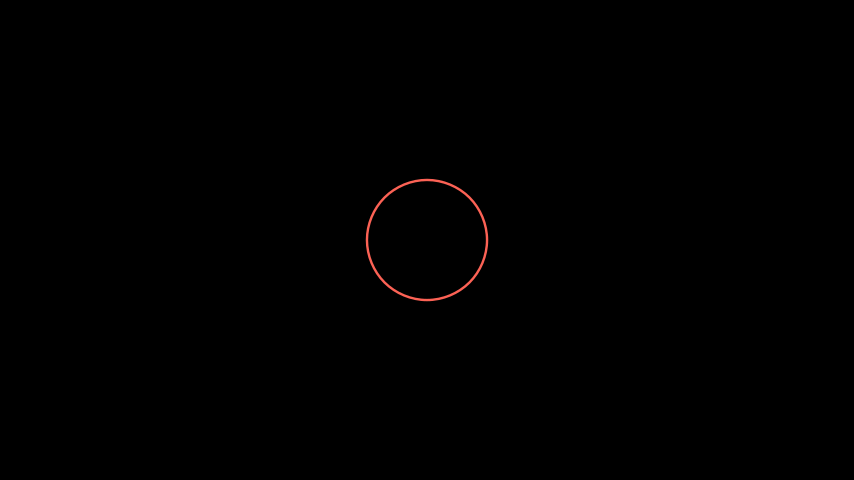

In [3]:
%%manim -v WARNING --disable_caching -ql -s Example1

class Example1(Scene):
    def construct(self):
        self.add(Circle())

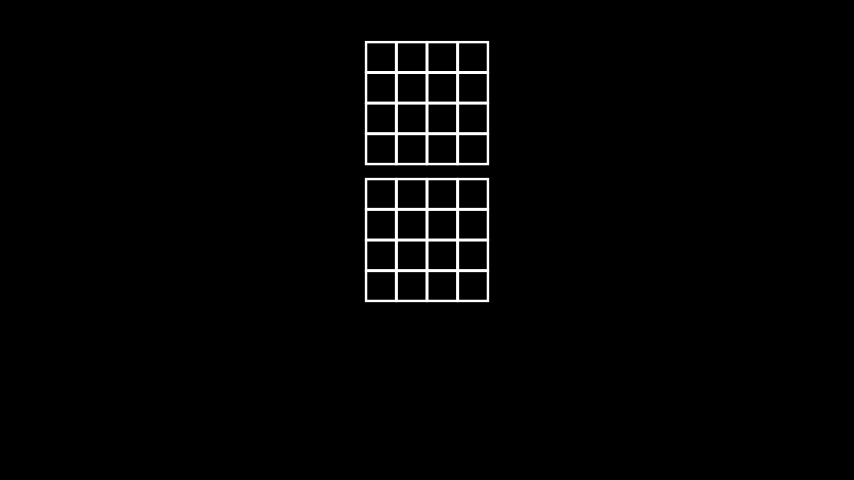

In [22]:
%%manim -v WARNING --disable_caching -ql -s ExampleBoxes

from manim import *

class ExampleBoxes(Scene):
    def construct(self):
        boxes=VGroup(*[Square(0.5) for s in range(0,16)])
        boxes.arrange_in_grid(rows=4, buff=0.01)
        self.add(boxes)
        
        b2=VGroup(*[Square(0.5) for s in range(0,16)])
        b2.arrange_in_grid(rows=4, buff=0.01)
        b2=b2.next_to(boxes, direction=UP)
        self.add(b2)
                

In [ ]:
%%manim -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()


In [ ]:
%%manim -qm HelloCircle

class HelloCircle(Scene):
    def construct(self):
        # blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        # We can also create a "plain" circle and add the desired attributes via set methods:
        circle = Circle()
        blue_circle = circle.set_color(BLUE).set_opacity(0.5)
        
        label = Text("A wild circle appears!")
        label.next_to(blue_circle, DOWN, buff=0.5)
        
        self.play(Create(blue_circle), Write(label))
        self.wait()

In [ ]:
%%manim -qm AnimateSyntax

class AnimateSyntax(Scene):
    def construct(self):
        triangle = Triangle(color=RED, fill_opacity=1)
        self.play(DrawBorderThenFill(triangle))
        self.play(triangle.animate.shift(LEFT))
        self.play(triangle.animate.shift(RIGHT).scale(2))
        self.play(triangle.animate.rotate(PI/3))

In [ ]:
%%manim -qm DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2*LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2*RIGHT)
        self.play(left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2)
        self.wait()

In [ ]:
%%manim -qm CauchyIntegralFormula

class CauchyIntegralFormula(Scene):
    def construct(self):
        formula = MathTex(r"[z^n]f(z) = \frac{1}{2\pi i}\oint_{\gamma} \frac{f(z)}{z^{n+1}}~dz")
        self.play(Write(formula), run_time=3)
        self.wait()

In [ ]:
%%manim -qm TransformEquation

class TransformEquation(Scene):
    def construct(self):
        eq1 = MathTex("42 {{ a^2 }} + {{ b^2 }} = {{ c^2 }}")
        eq2 = MathTex("42 {{ a^2 }} = {{ c^2 }} - {{ b^2 }}")
        eq3 = MathTex(r"a^2 = \frac{c^2 - b^2}{42}")
        self.add(eq1)
        self.wait()
        self.play(TransformMatchingTex(eq1, eq2))
        self.wait()
        self.play(TransformMatchingShapes(eq2, eq3))
        self.wait()

In [ ]:
%%manim -qm FormulaEmphasis

class FormulaEmphasis(Scene):
    def construct(self):
        product_formula = MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        self.play(Write(product_formula))
        box1 = SurroundingRectangle(product_formula[1], buff=0.1)
        box2 = SurroundingRectangle(product_formula[3], buff=0.1)
        self.play(Create(box1))
        self.wait()
        self.play(Transform(box1, box2))
        self.wait()

In [ ]:
%%manim -qm PlotExample

class PlotExample(Scene):
    def construct(self):
        plot_axes = Axes(
            x_range=[0, 1, 0.05],
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = plot_axes.get_x_axis_label("x")
        plot_labels = VGroup(x_label, y_label)

        plots = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            plots += plot_axes.plot(lambda x: x**n, color=WHITE)
            plots += plot_axes.plot(
                lambda x: x**(1 / n), color=WHITE, use_smoothing=False
            )

        extras = VGroup()
        extras += plot_axes.get_horizontal_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += plot_axes.get_vertical_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += Dot(point=plot_axes.c2p(1, 1, 0), color=YELLOW)
        title = Title(
            r"Graphs of $y=x^{\frac{1}{n}}$ and $y=x^n (n=1, 1.5, 2, 2.5, 3, \dots, 20)$",
            include_underline=False,
            font_size=40,
        )
        
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels), Create(extras))
        self.play(AnimationGroup(*[Create(plot) for plot in plots], lag_ratio=0.05))

In [ ]:
%%manim -qm ErdosRenyiGraph

import networkx as nx

nxgraph = nx.erdos_renyi_graph(14, 0.5)

class ErdosRenyiGraph(Scene):
    def construct(self):
        G = Graph.from_networkx(nxgraph, layout="spring", layout_scale=3.5)
        self.play(Create(G))
        self.play(*[G[v].animate.move_to(5*RIGHT*np.cos(ind/7 * PI) +
                                         3*UP*np.sin(ind/7 * PI))
                    for ind, v in enumerate(G.vertices)])
        self.play(Uncreate(G))

In [ ]:
%%manim -qm CodeFromString

class CodeFromString(Scene):
    def construct(self):
        code = '''from manim import Scene, Square

class FadeInSquare(Scene):
    def construct(self):
        s = Square()
        self.play(FadeIn(s))
        self.play(s.animate.scale(2))
        self.wait()
'''
        rendered_code = Code(code=code, tab_width=4, background="window",
                            language="Python", font="Monospace")
        self.play(Write(rendered_code))
        self.wait(2)

In [ ]:
%%manim -qm OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=UP),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(-10, 10, 1), y_range=(-6.0, 6.0, 1))
        grid_title = Tex("This is a grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p + np.array([np.sin(p[1]), np.sin(p[0]), 0])
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

In [ ]:
%%manim -qm -v WARNING UpdatersExample

class UpdatersExample(Scene):
    def construct(self):
        decimal = DecimalNumber(
            0,
            show_ellipsis=True,
            num_decimal_places=3,
            include_sign=True,
        )
        square = Square().to_edge(UP)

        decimal.add_updater(lambda d: d.next_to(square, RIGHT))
        decimal.add_updater(lambda d: d.set_value(square.get_center()[1]))
        self.add(square, decimal)
        self.play(
            square.animate.to_edge(DOWN),
            rate_func=there_and_back,
            run_time=5,
        )
        self.wait()